Лягушка-квакушка смотрит глаголы говорения и движения.
Сначала берет соседей первого и второго порядков с косинусной близостью от 0,5. 
Строятся столбчатые диаграммы, сравнивающие количество близких по значению слов обоих глаголов сначала по соседям первого поядка, потом по соседям второго.
Строятся семантические поля.
Используются: word2vec, matpoltlib, networkx.

In [48]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import urllib.request
url = "http://rusvectores.org/static/models/rusvectores2/" \
    "ruscorpora_mystem_cbow_300_2_2015.bin.gz"
m = "ruscorpora_mystem_cbow_300_2_2015.bin.gz"

import os
if m not in os.listdir():
    urllib.request.urlretrieve(url, m)
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)
    
model.init_sims(replace=True)

#соседи первого порядка ГОВОРИТЬ
neibs_sp1 = []
words = ['говорить_V']
for word in words:
    if word in model:
        for i in model.most_similar(positive=[word], topn=1000):
            if i[0].endswith('_V') and i[1] >= 0.5:
                a1 = (word, i[0], i[1])
                neibs_sp1.append(a1)
    else:
        print(word + ' is not present in the model')
#for item in neibs_sp1:
    #print(item)
    
#соседи первого порядка ИДТИ
neibs_g1 = []
words = ['идти_V']
for word in words:
    if word in model:
        for i in model.most_similar(positive=[word], topn=1000):
            if i[0].endswith('_V') and i[1] >= 0.5:
                c1 = (word, i[0], i[1])
                neibs_g1.append(c1)
    else:
        print(word + ' is not present in the model')
#for item in neibs_g1:
    #print(item)

#топ-30 по соседям первого и второго порядков ГОВОРИТЬ
neibs_sp = []
words = ['говорить_V']
for word in words:
    if word in model:
        for i in model.most_similar(positive=[word], topn=30):
            if i[0].endswith('_V') and i[1] >= 0.5:
                a = (word, i[0], i[1])
                neibs_sp.append(a)
                for k in model.most_similar(positive=[i[0]], topn=30):
                    if k[0].endswith('_V') and k[1] >= 0.5:
                        b = (i[0], k[0], k[1])
                        neibs_sp.append(b)
    else:
        print(word + ' is not present in the model')
#for item in neibs_sp:
    #print(item)
    
#топ-30 по соседям первого и второго порядков ИДТИ
neibs_g = []
words = ['идти_V']
for word in words:
    if word in model:
        for i in model.most_similar(positive=[word], topn=30):
            if i[0].endswith('_V') and i[1] >= 0.5:
                c = (word, i[0], i[1])
                neibs_g.append(c)
                for k in model.most_similar(positive=[i[0]], topn=30):
                    if k[0].endswith('_V') and k[1] >= 0.5:
                        d = (i[0], k[0], k[1])
                        neibs_g.append(d)
    else:
        print(word + ' is not present in the model')
#for item in neibs_g:
    #print(item)

2019-06-12 22:28:02,485 : INFO : loading projection weights from ruscorpora_mystem_cbow_300_2_2015.bin.gz
/Users/new.aloha/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-12 22:28:18,690 : INFO : loaded (281776, 300) matrix from ruscorpora_mystem_cbow_300_2_2015.bin.gz
2019-06-12 22:28:18,751 : INFO : precomputing L2-norms of word weight vectors


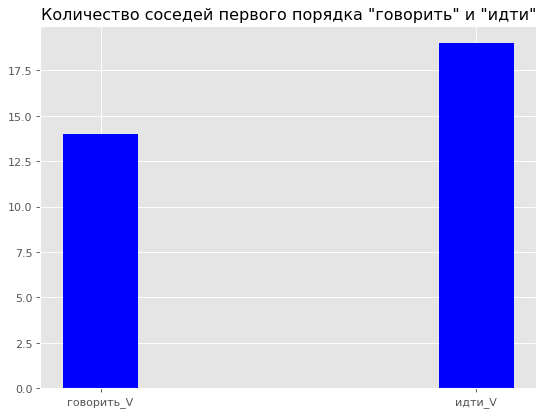

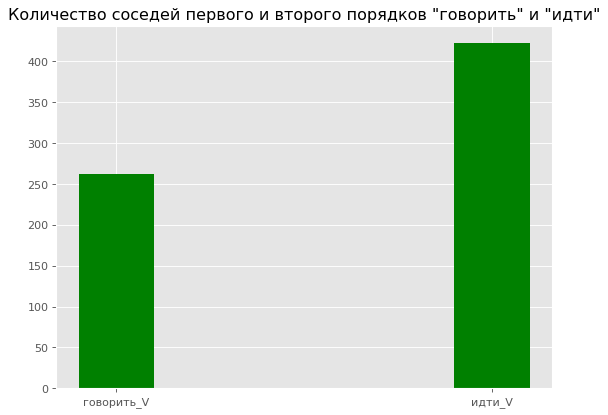

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
word1 = neibs_sp1[0][0] 
word2 = neibs_g1[0][0] 
x = [word1, word2] 
y = [len(neibs_sp1), len(neibs_g1)] 
plt.bar(x, y, width = 0.2, color='b') 
plt.title('Количество соседей первого порядка "говорить" и "идти"') 
plt.xticks(range(len(x)), [i for i in x])
plt.show()

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
word3 = neibs_sp[0][0] 
word4 = neibs_g[0][0] 
a = [word3, word4] 
b = [len(neibs_sp), len(neibs_g)] 
plt.bar(a, b, width = 0.2, color='g') 
plt.title('Количество соседей первого и второго порядков "говорить" и "идти"') 
plt.xticks(range(len(a)), [i for i in a])
plt.show()

У глаголов говорения в принципе меньше синонимов, чем у глаголов движения, что подтверждается пропорциональной разницей на обоех диаграммах при добавлении соседей второго порядка. 
Русский язык скорее подвижен, чем болтлив :)
NB! Это псевдовывод для хи-хи и ха-ха.

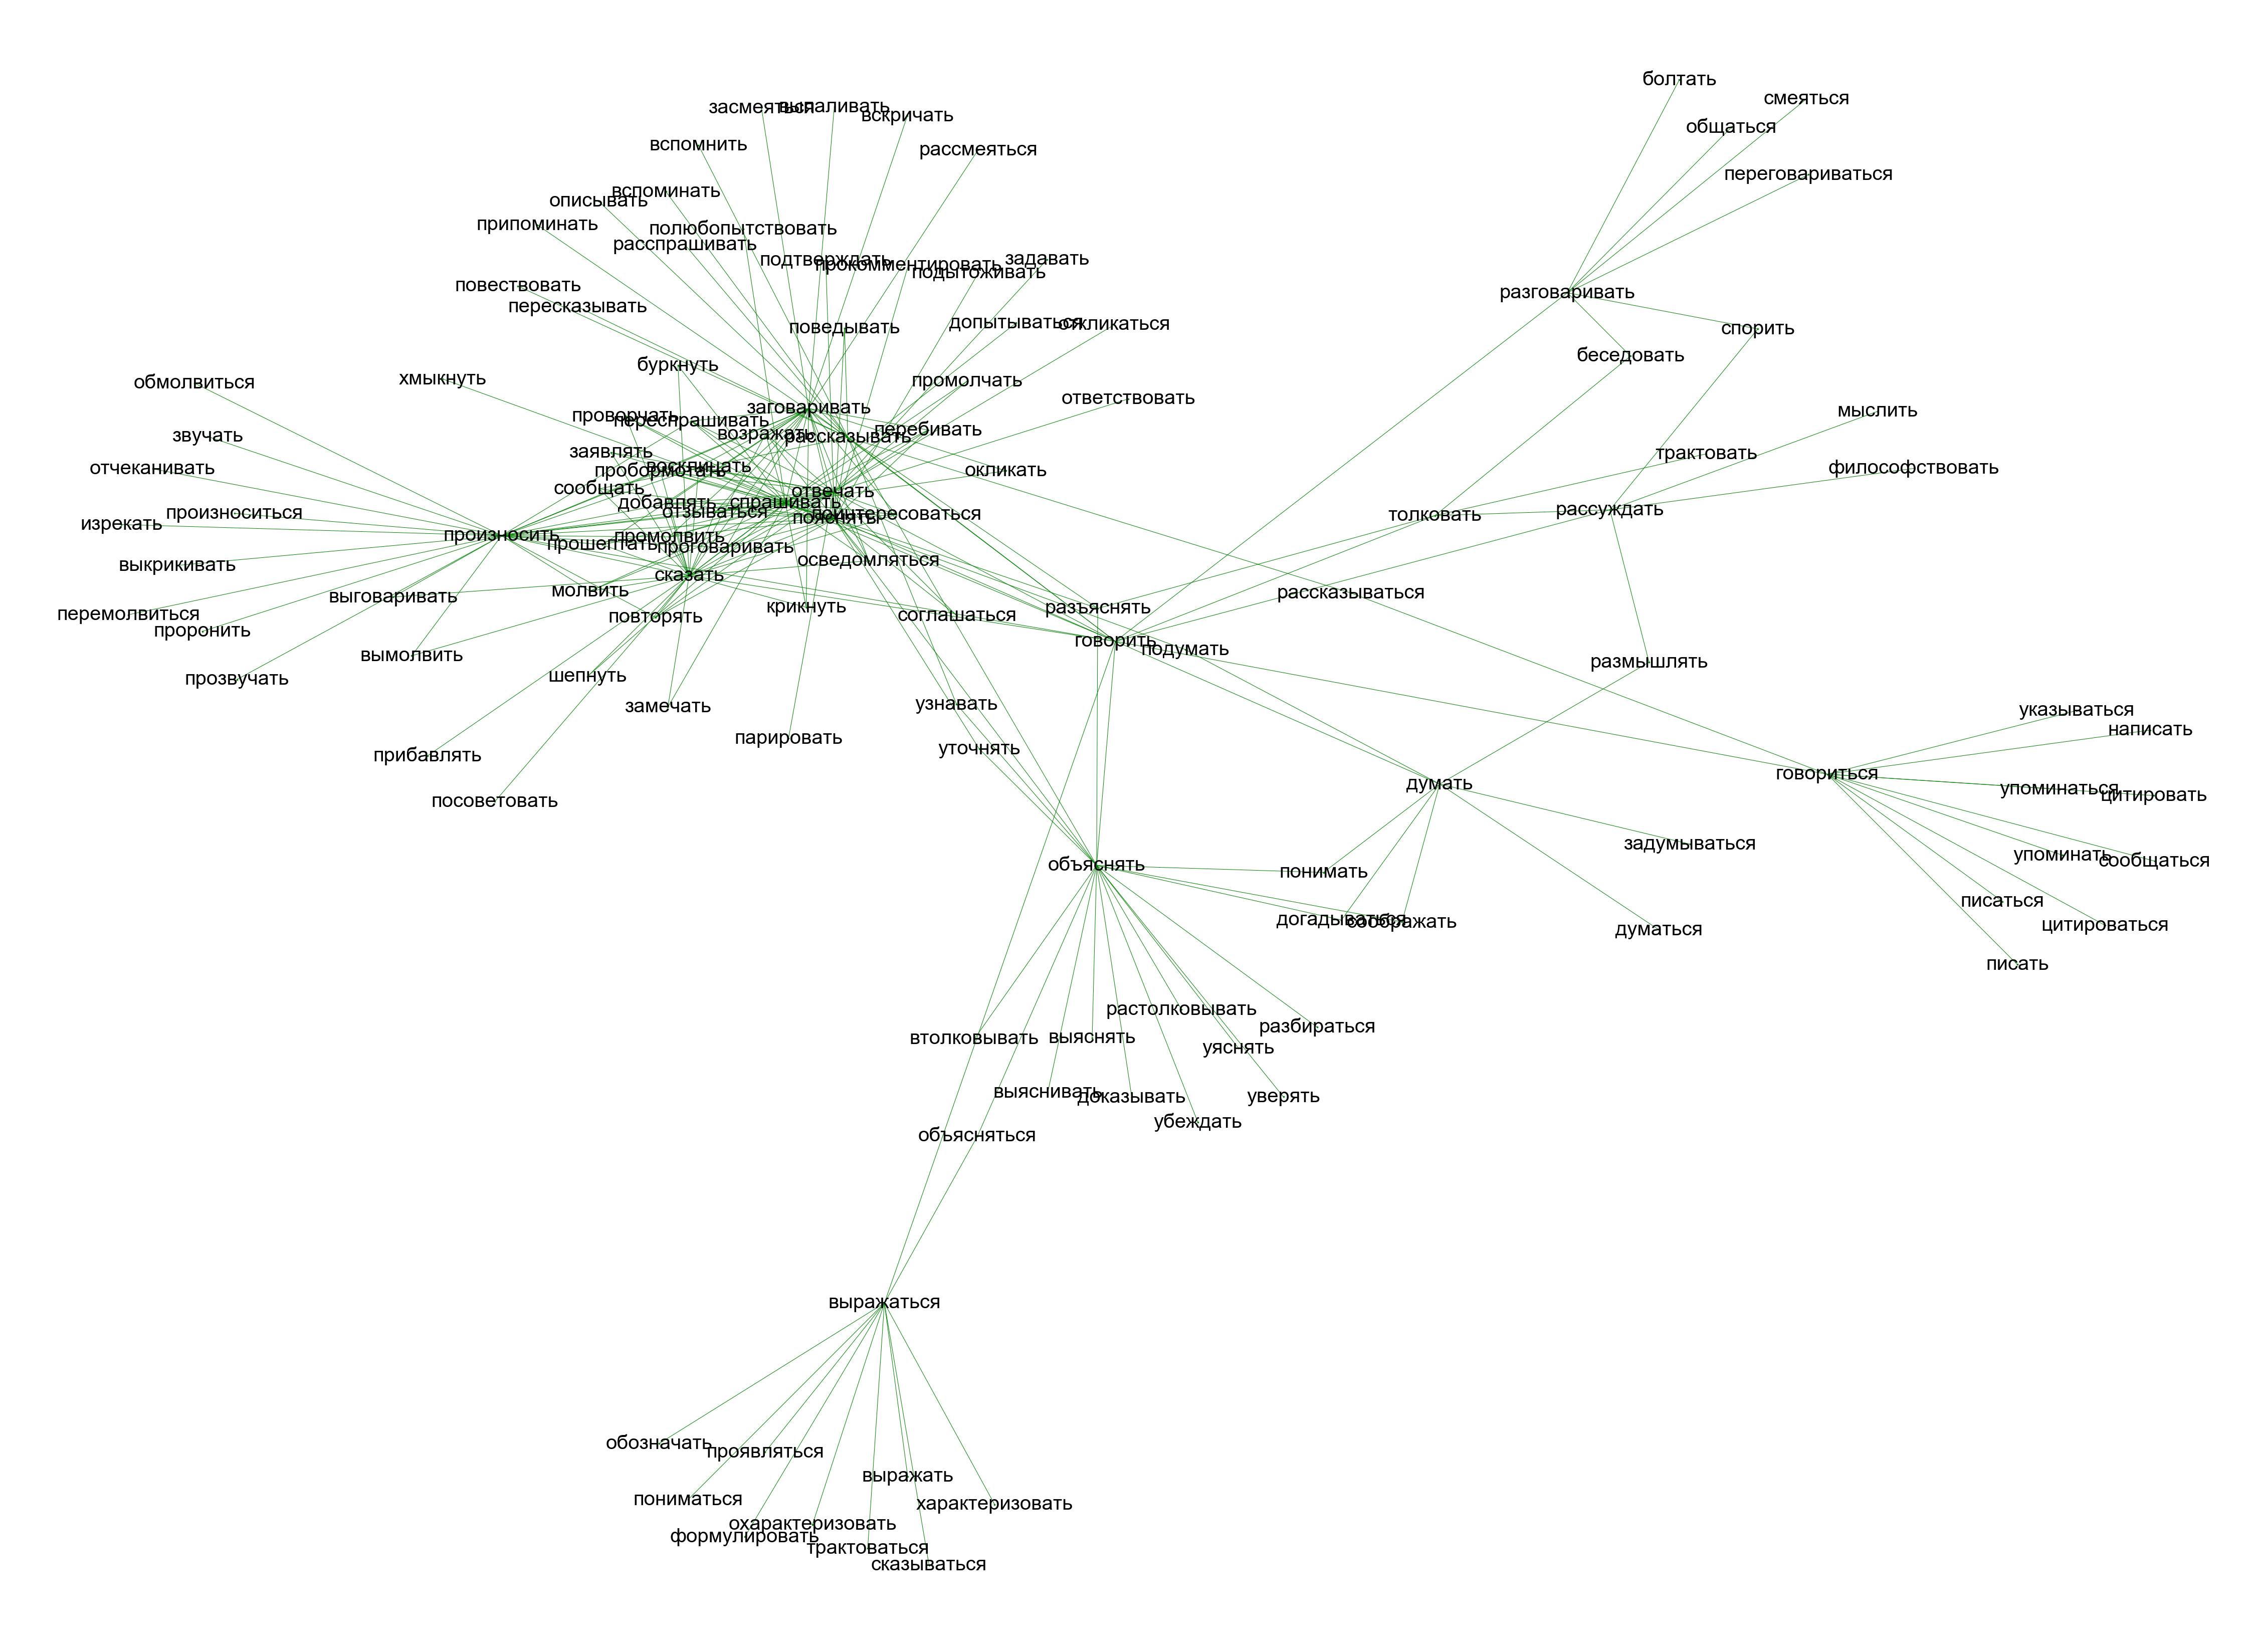

In [61]:
import networkx as nx

#граф ГОВОРИТЬ
words = []
for a in neibs_sp:
    for item in a:
        if isinstance(item, str):
            if item not in words:
                words.append(item)

G_sp = nx.Graph()
for key in words:
    G_sp.add_node(key[:-2])
for a in neibs_sp:
    n1 = a[0][:-2]
    n2 = a[1][:-2]
    wg = a[2]
    G_sp.add_edge(n1, n2, weight=wg)
    
nx.write_gexf(G_sp, 'graph_file1.gexf')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

pos=nx.spring_layout(G_sp)

nx.draw_networkx_nodes(G_sp, pos, node_color='green', node_size=10)
nx.draw_networkx_edges(G_sp, pos, edge_color='green')
nx.draw_networkx_labels(G_sp, pos, font_size=40, font_family='Arial')
plt.rcParams["figure.figsize"] = (80, 60)
plt.axis('off')
plt.show()

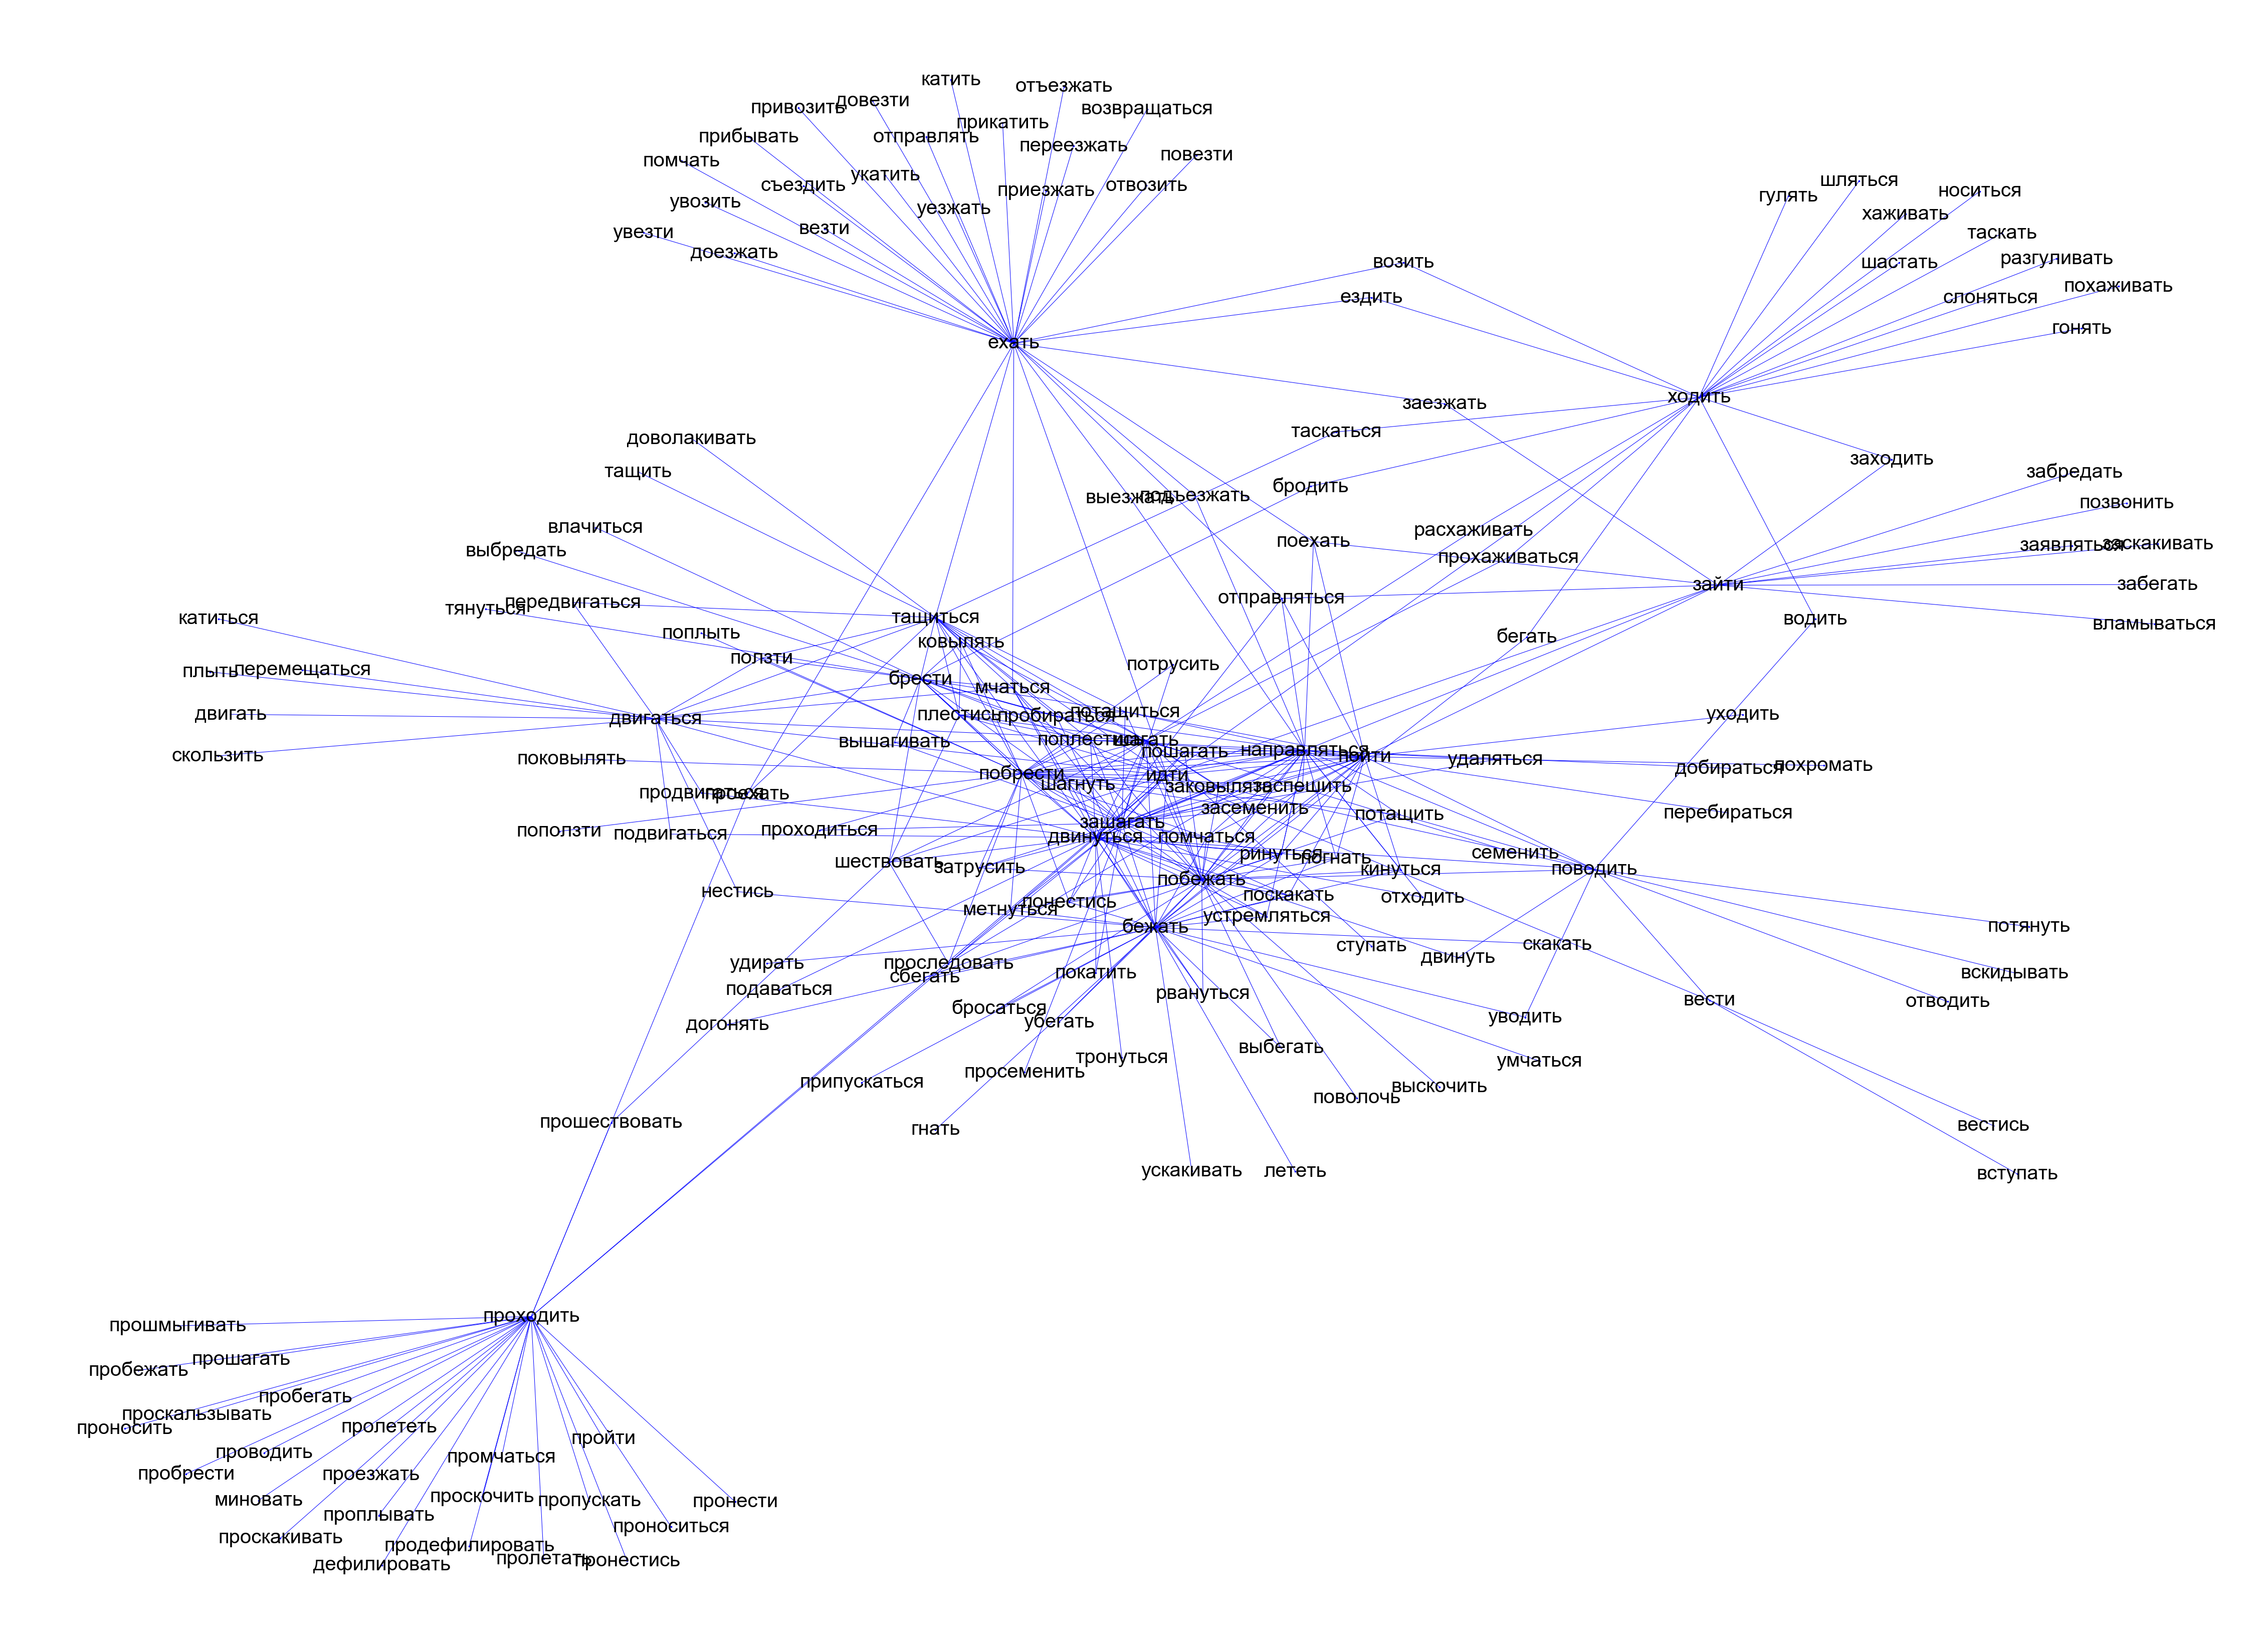

In [53]:
#граф ИДТИ
words = []
for a in neibs_g:
    for item in a:
        if isinstance(item, str):
            if item not in words:
                words.append(item)

G_g = nx.Graph()
for key in words:
    G_g.add_node(key[:-2])
for a in neibs_g:
    n1 = a[0][:-2]
    n2 = a[1][:-2]
    wg = a[2]
    G_g.add_edge(n1, n2, weight=wg)
    
nx.write_gexf(G_g, 'graph_file2.gexf')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') 

pos=nx.spring_layout(G_g)

nx.draw_networkx_nodes(G_g, pos, node_color='blue', node_size=10)
nx.draw_networkx_edges(G_g, pos, edge_color='blue')
nx.draw_networkx_labels(G_g, pos, font_size=40, font_family='Arial')
plt.rcParams["figure.figsize"] = (80, 60)
plt.axis('off')
plt.show()

In [ ]:
'''
from networkx.algorithms import community
communities_generator = community.girvan_newman(G_sp)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

from networkx.algorithms import community
communities_generator = community.girvan_newman(G_g)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))
'''